# Optimalizace výběru položek do omezeného prostoru pomocí genetického algoritmu

**Semestrální úkol předmětu VI1 - Univerzita Hradec Králové**

**Autor:** Bc. Adéla Leppeltová <br>
**Akademický rok:** 2024/25 <br>

[Odkaz na repozitář na GitHubu](https://github.com/adelaleppeltova/knapsackproblem)



## Obsah
- [Popis](#popis)
- [Import knihoven](#import-knihoven)
- [Definice datových struktur](#definice-datovych-struktur)
- [Nastavení parametrů](#nastaveni-parametru)
- [Definice funkcí](#definice-funkci)
- [Algoritmus](#algoritmus)
- [Spuštění algoritmu a výstup](#spusteni-algoritmu-a-vystup)
- [Vizualizace výstupu](#vizualizace-vystupu)
- [Závěr a shrnutí](#zaver-a-shrnuti)


## Popis
<a id='popis'></a>
Tento projekt se zabývá řešením kombinatorického problému – úlohy o batohu (knapsack problem) – pomocí genetického algoritmu.  

Cílem je nalézt takovou kombinaci položek, která nepřekročí maximální povolenou hmotnost batohu, zároveň maximalizuje celkovou hodnotu a využije dostupný prostor co nejefektivněji.  

**Reprezentace jedince:** binární vektor (např. [1, 0, 1, 1, 0])  
**Fitness funkce:** penalizuje přetížení a kombinuje hodnotu a počet položek  
**Selekce:** pravděpodobnostní selekce na základě fitness  
**Křížení:** jednobodové (single-point crossover)  
**Mutace:** náhodné přepnutí bitu s pravděpodobností parametru MUTATION_RATE  

**Příklady použití:**
- optimalizace tras pro doručování zboží;
- alokace zdrojů - optimalizace přiřazení lidí, strojů, času;
- správa skladu - rozhodování, jaké položky mají být uskladněny tak, aby bylo dosaženo maximálního zisku v omezeném prostoru.


## Import knihoven
<a id='import-knihoven'></a>

In [2]:
from dataclasses import dataclass
import random
import matplotlib.pyplot as plt

## Definice datových struktur
<a id='definice-datovych-struktur'></a>

In [ ]:
@dataclass
class Item:
    name: str
    weight: float
    value: float

# Seznam položek
items = [
    Item("Notebook", 3.0, 10000),
    Item("Foťák", 1.5, 15000),
    Item("Kniha", 0.5, 300),
    Item("Mobil", 0.3, 8000),
    Item("Sluchátka", 0.4, 1400),
    Item("Lahev s vodou", 1.0, 150),
    Item("Bunda", 0.6, 700),
    Item("Peněženka", 0.2, 200),
    Item("Powerbanka", 0.6, 600),
    Item("Hodinky", 0.2, 1000),
    Item("Svačina", 0.4, 50),
    Item("Lopata", 5.0, 100),
    Item("Sekera", 4.0, 100),
    Item("Stan", 5.0, 2200),
]

## Nastavení parametrů
<a id='nastaveni-parametru'></a>

Nastavení parametrů genetického algoritmu, například maximální hmotnost batohu, velikost populace a pravděpodobnost mutace.

In [4]:
MAX_WEIGHT = 8.0
POPULATION_SIZE = 50
GENERATIONS = 100
MUTATION_RATE = 0.05

## Definice funkcí
<a id='definice-funkci'></a>

Tvorba jedince, populace, vyhodnocení, selekce, křížení a mutace.

In [ ]:
def generate_individual(n_items):
    return [random.randint(0, 1) for _ in range(n_items)] # generování jedince s náhodnými geny (0 nebo 1)

def generate_population(size, n_items):
    return [generate_individual(n_items) for _ in range(size)]

def fitness(individual, items, max_weight): # výpočet fitness hodnoty jedince
    total_weight = total_value = 0
    for gene, item in zip(individual, items):
        if gene == 1:
            total_weight += item.weight
            total_value += item.value
    if total_weight > max_weight:
        return 0
    item_count = sum(individual)
    return total_value + item_count * 10 # bonus pro počet položek

def selection(population, fitnesses):
    return random.choices(population, weights=fitnesses, k=2) # výběr dvou rodičů na základě fitness hodnot

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    return parent1[:point] + parent2[point:] # křížení mezi dvěma rodiči

def mutate(individual, mutation_rate):
    return [gene if random.random() > mutation_rate else 1 - gene for gene in individual] # mutace jednotlivých genů

## Algoritmus
<a id='algoritmus'></a>

In [ ]:
def run_genetic_algorithm():
    best_fitness_history = []
    population = generate_population(POPULATION_SIZE, len(items)) # generování počáteční populace


    for gen in range(GENERATIONS):
        fitnesses = [fitness(ind, items, MAX_WEIGHT) for ind in population] # výpočet fitness hodnot pro každého jedince
        
        best_fitness = max(fitnesses) # nalezení nejlepší fitness hodnoty v populaci
        best_fitness_history.append(best_fitness)

        new_population = []

        for _ in range(POPULATION_SIZE): # vytvoření nové populace
            parent1, parent2 = selection(population, fitnesses) # výběr rodičů
            child = crossover(parent1, parent2)
            child = mutate(child, MUTATION_RATE)
            new_population.append(child) # přidání potomka do nové populace

        population = new_population

    fitnesses = [fitness(ind, items, MAX_WEIGHT) for ind in population]
    best_index = fitnesses.index(max(fitnesses))
    best_solution = population[best_index]
    

# Vypsání výsledků
    print("\nNejlepší nalezené řešení:")
    total_weight = total_value = item_count = 0
    selected_items = []

    for gene, item in zip(best_solution, items): # procházení nejlepšího řešení
        if gene == 1:
            selected_items.append(item)
            total_weight += item.weight
            total_value += item.value
            item_count += 1

    for item in selected_items:
        print(f"- {item.name} (hmotnost: {item.weight} kg, hodnota: {item.value} Kč)")

    print(f"\nCelková hmotnost: {total_weight:.2f} kg")
    print(f"Celková hodnota: {total_value:.2f} Kč")
    print(f"Počet položek v batohu: {item_count}")
    print("\nBinární reprezentace řešení:")
    print(" ".join(map(str, best_solution)))
    return best_fitness_history

## Spuštění algoritmu a výstup
<a id='spusteni-algoritmu-a-vystup'></a>

In [ ]:
all_runs = []
for i in range(5):
    fitness_history = run_genetic_algorithm()
    all_runs.append(fitness_history)


Nejlepší nalezené řešení:
- Notebook (hmotnost: 3.0 kg, hodnota: 10000 Kč)
- Foťák (hmotnost: 1.5 kg, hodnota: 15000 Kč)
- Kniha (hmotnost: 0.5 kg, hodnota: 300 Kč)
- Mobil (hmotnost: 0.3 kg, hodnota: 8000 Kč)
- Sluchátka (hmotnost: 0.4 kg, hodnota: 1400 Kč)
- Lahev s vodou (hmotnost: 1.0 kg, hodnota: 150 Kč)
- Bunda (hmotnost: 0.6 kg, hodnota: 700 Kč)
- Hodinky (hmotnost: 0.2 kg, hodnota: 1000 Kč)
- Svačina (hmotnost: 0.4 kg, hodnota: 50 Kč)

Celková hmotnost: 7.90 kg
Celková hodnota: 36600.00 Kč
Počet položek v batohu: 9

Binární reprezentace řešení:
1 1 1 1 1 1 1 0 0 1 1 0 0 0

Nejlepší nalezené řešení:
- Notebook (hmotnost: 3.0 kg, hodnota: 10000 Kč)
- Foťák (hmotnost: 1.5 kg, hodnota: 15000 Kč)
- Mobil (hmotnost: 0.3 kg, hodnota: 8000 Kč)
- Sluchátka (hmotnost: 0.4 kg, hodnota: 1400 Kč)
- Lahev s vodou (hmotnost: 1.0 kg, hodnota: 150 Kč)
- Bunda (hmotnost: 0.6 kg, hodnota: 700 Kč)
- Powerbanka (hmotnost: 0.6 kg, hodnota: 600 Kč)
- Hodinky (hmotnost: 0.2 kg, hodnota: 1000 Kč)

Cel

## Vizualizace výstupu
<a id='vizualizace-vystupu'></a>

Graf zobrazuje vývoj pěti běhů algoritmu.

osa X = číslo generace <br>
osa Y = hodnota fitness v dané generaci

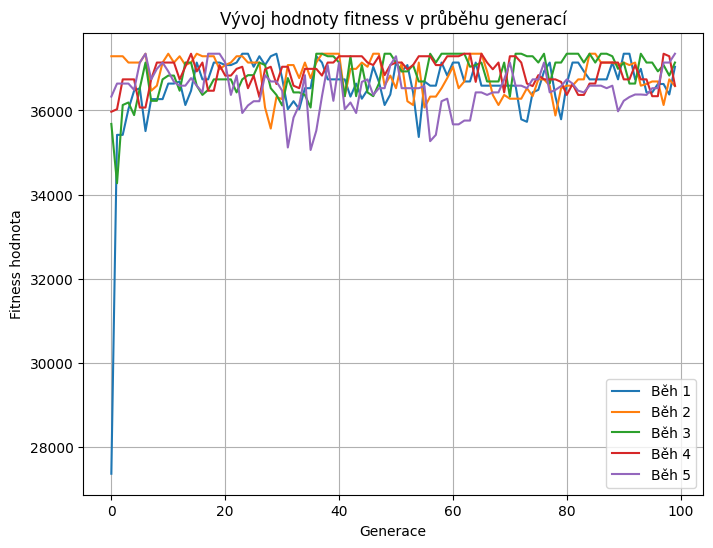

In [ ]:
plt.figure(figsize=(8, 6))
for i, history in enumerate(all_runs):
    plt.plot(history, label=f'Běh {i+1}')
plt.xlabel('Generace')
plt.ylabel('Fitness hodnota')
plt.title('Vývoj hodnoty fitness v průběhu generací')
plt.legend()
plt.grid(True)
plt.show()

## Závěr a shrnutí
<a id='zaver-a-shrnuti'></a>

Tento seminární úkol ukazuje, že genetický algoritmus je efektivní nástroj pro řešení batohového problému (knapsack problem). Graf ukazuje, že algoritmus během prvních generací dosahuje dobrých výsledků.

**Možné rozšíření úlohy:**
- Multi-knapsack Problem – více batohů.
- Fractional Knapsack Problem – předměty lze do batohu vkládat po částech.
- Unbounded Knapsack Problem – předměty lze zahrnout vícekrát. 
